In [172]:
import pandas as pd
import datetime as dt

In [173]:
df = pd.read_csv("train.csv")
sample = pd.read_csv("sample_submission.csv")

In [174]:
df.tail()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8
23010,2022-12-31,2.1,-5.1,7.2,0.0,65.5,1.4,1.1,4.16,11.5,-1.2


In [142]:
df.isna().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [175]:
df['일시'] = pd.to_datetime(df['일시'])

In [176]:
# 년-달-일 분리
df['년'] = df['일시'].dt.year
df['달'] = df['일시'].dt.month
df['일'] = df['일시'].dt.day

In [51]:
df.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,년,달,일
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6,1960,1,1
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9,1960,1,2
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0,1960,1,3
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5,1960,1,4
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6,1960,1,5


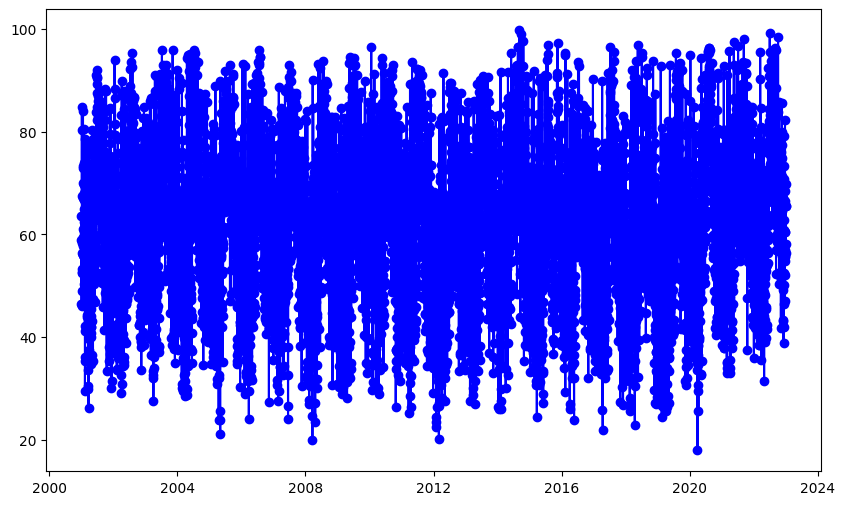

In [26]:
# 2000년 부터 온도 추세 보기
import matplotlib.pyplot as plt
df_test = df[df['년'] > 2000]
plt.figure(figsize=(10, 6))
plt.plot(df_test['일시'], df_test['평균습도'], marker='o', linestyle='-', color='b')

In [177]:
# 결측치 채우기
null_cols = ['최고기온', '최저기온', '평균풍속', '일조합', '일사합','일조율']
for col in null_cols:
  df[col].interpolate(method='linear', inplace=True)

df['일교차'] = df['최고기온'] - df['최저기온']
df.loc[df['강수량'].isnull(), '강수량'] = 0.0
df.bfill(axis = 0, inplace = True)

In [62]:
df

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,년,달,일
0,1960-01-01,2.2,-5.2,7.4,0.0,68.3,1.7,6.7,4.81,28.1,-1.6,1960,1,1
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,4.81,28.1,-1.9,1960,1,2
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,4.81,28.1,4.0,1960,1,3
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,4.81,28.1,7.5,1960,1,4
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,4.81,28.1,-4.6,1960,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,0.0,69.8,1.8,8.8,10.25,91.7,-2.6,2022,12,27
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3,2022,12,28
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,2022,12,29
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8,2022,12,30


/Users/goodyoung/Desktop/GIt/myMLstudy/.mlvenv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/Users/goodyoung/Desktop/GIt/myMLstudy/.mlvenv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/Users/goodyoung/Desktop/GIt/myMLstudy/.mlvenv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/Users/goodyoung/Desktop/GIt/myMLstudy/.mlvenv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  func(*args, **kwargs)
/Users/goodyoung/Desktop/GIt/myMLstudy/.mlvenv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current f

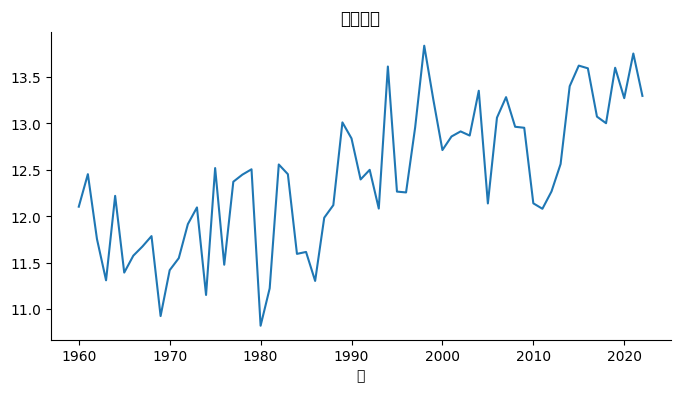

In [103]:
df_년 = df.groupby('년')[['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율','평균기온']].mean()
# df_년.plot()
# df_년['강수량'].plot(kind='line', figsize=(8, 4), title='강수량')
# plt.gca().spines[['top', 'right']].set_visible(False)
df_년['평균기온'].plot(kind='line', figsize=(8, 4), title='평균기온')
plt.gca().spines[['top', 'right']].set_visible(False)

In [178]:
# train = df.iloc[21185:].reset_index()
train = df.iloc[5479:].reset_index(drop=True)
# test = df.iloc[22646:]
test = df.iloc[22281:22646]

In [171]:
# df.iloc[22281:22646]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,년,달,일
22281,2021-01-01,1.6,-9.8,11.4,0.0,64.0,2.0,6.5,9.54,67.7,-4.2,2021,1,1
22282,2021-01-02,-1.4,-8.4,7.0,0.0,38.5,2.6,9.0,11.34,93.8,-5.0,2021,1,2
22283,2021-01-03,-2.0,-9.1,7.1,0.0,45.0,2.0,5.5,8.80,56.7,-5.6,2021,1,3
22284,2021-01-04,0.3,-8.4,8.7,0.0,51.4,1.7,4.6,7.44,47.4,-3.5,2021,1,4
22285,2021-01-05,-2.1,-9.9,7.8,0.0,52.8,2.9,8.6,10.46,88.7,-5.5,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22641,2021-12-27,-3.9,-12.9,9.0,0.0,60.9,1.7,3.8,6.09,39.6,-7.6,2021,12,27
22642,2021-12-28,-0.9,-8.5,7.6,0.0,73.8,2.2,1.7,4.32,17.7,-4.1,2021,12,28
22643,2021-12-29,5.9,-3.8,9.7,0.2,72.9,2.6,1.8,4.64,18.8,0.4,2021,12,29
22644,2021-12-30,0.2,-6.8,7.0,0.0,48.5,3.3,7.3,9.14,76.0,-3.9,2021,12,30


In [182]:
train

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,년,달,일
0,1.6,-9.8,11.4,0.0,64.0,2.0,6.5,9.54,67.7,-4.2,2021,1,1
1,-1.4,-8.4,7.0,0.0,38.5,2.6,9.0,11.34,93.8,-5.0,2021,1,2
2,-2.0,-9.1,7.1,0.0,45.0,2.0,5.5,8.80,56.7,-5.6,2021,1,3
3,0.3,-8.4,8.7,0.0,51.4,1.7,4.6,7.44,47.4,-3.5,2021,1,4
4,-2.1,-9.9,7.8,0.0,52.8,2.9,8.6,10.46,88.7,-5.5,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-3.9,-12.9,9.0,0.0,60.9,1.7,3.8,6.09,39.6,-7.6,2021,12,27
361,-0.9,-8.5,7.6,0.0,73.8,2.2,1.7,4.32,17.7,-4.1,2021,12,28
362,5.9,-3.8,9.7,0.2,72.9,2.6,1.8,4.64,18.8,0.4,2021,12,29
363,0.2,-6.8,7.0,0.0,48.5,3.3,7.3,9.14,76.0,-3.9,2021,12,30


In [184]:
# test = test.iloc[:358].reset_index()
test = df.iloc[22281:22646].reset_index(drop=True)
test['일시'] = sample['일시']
test_일시 = test.pop('일시')
# train = train.drop(['index','일시'],axis=1)
# train = train.drop(['일시'],axis=1)
test = test.drop(['평균기온'],axis=1)
target = train.pop('평균기온')
train.shape,test.shape # (1826, 11) (358, 11)

((17532, 12), (365, 12))

In [ ]:
# labelencoder
from sklearn.preprocessing import LabelEncoder
cols= train.select_dtypes(include="O").columns
cols
for col in cols:
  le = LabelEncoder()
  train[col] = le.fit_transform(train[col])
  test[col] = le.transform(test[col])

In [185]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val= train_test_split(train,target,test_size=0.2,random_state=0)
X_tr.shape,X_val.shape,y_tr.shape,y_val.shape  #(1460, 11) (366, 11) (1460,) (366,)

((14025, 12), (3507, 12), (14025,), (3507,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
rf= RandomForestRegressor(random_state=0,max_depth=10,n_estimators=500)
rf.fit(X_tr,y_tr)
pred = rf.predict(X_val)
print("RandomForest:",mean_absolute_error(y_val,pred))

from xgboost import XGBRegressor
xgb= XGBRegressor(random_state=0)
xgb.fit(X_tr,y_tr)
pred = xgb.predict(X_val)
print("XGboost:",mean_absolute_error(y_val,pred))  #0.4805682015152333

# from lightgbm import LGBMRegressor
# lgb= LGBMRegressor(random_state=0)
# lgb.fit(X_tr,y_tr)
# pred = lgb.predict(X_val)
# print("LGBMRegressor:",mean_absolute_error(y_val,pred))

# 제출
pred = rf.predict(test)
submit = pd.DataFrame({
    "일시":test_일시,
    "평균기온":pred
})
# submit.to_csv('submission.csv',index=False)

In [136]:
pred = rf.predict(test)
submit = pd.DataFrame({
    "일시":test_일시,
    "평균기온":pred
})

In [ ]:
# RandomForest: 0.4032736063186255
# XGboost: 0.44709490689097864

In [113]:
submit.head()

,일시,평균기온
0,2023-01-01,-4.511854
1,2023-01-02,-1.257489
2,2023-01-03,-2.818440
3,2023-01-04,-2.684038
4,2023-01-05,-2.652951


In [165]:
submit.to_csv('submission4.csv',index=False)